<img src="imgs/mioti_empire.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S4: Data augmentation

`General, sabemos que quiere dejar las trincheras para pasar a su nuevo cargo de LORD DE LOS DATOS en el IMPERIO GALÁCTICO. Está usted a prueba para un sistema crítico para el IMPERIO GALÁCTICO, pues después de las incursiones en Scarif, debemos proceder con un método de detección de transmisiones enemigas dentro de nuestra órbita. Esta será su carta de presentación.`

`Para ello, se le dispondrá de un set de datos extraído de los últimos intentos de ataque en nuestro silo de planos de armas secretas. Estos datos muestran obviamente y gracias al trabajo del antiguo general al mando, ya *jubilado*, un problema grave de desbalanceo en cuanto a tipología de los datos, así que será su labor trabajar con ellos para conseguir un balanceo orden y deacuerdo a las directrices del glorioso IMPERIO GALÁCTICO.`

`Como primera tarea, se le solicita un primer vistazo a los datos.`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(1234)

tr = pd.read_csv("data/transmission_small.csv")

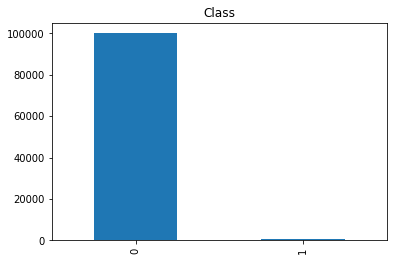

In [2]:
tr['Class'].value_counts().plot(kind='bar', title='Class')
#tr.info()

`Se necesita entender la magnitud del problema. Informe del posible desbalanceo de los datos, tanto por escrito como mediante la gráfica que usted considere oportuna`

In [3]:
tr['Class'].value_counts()/len(tr['Class'])

0    0.995104
1    0.004896
Name: Class, dtype: float64

`También deberá conocer en qué rango se manejan los datos y con qué estamos trabajando. Una gráfica de puntos podría ser lo más adecuado ahora.`

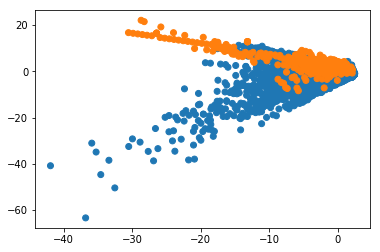

In [4]:
colors = tr['Class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = tr['V1'], y = tr['V2'], c=colors)

`Le proponemos ahora una función sencilla para evaluar su sistema de mejora de los datos. Esta función no deberá modificarse y como único requisito deberá de suministrar los datos como parámetro.`

In [5]:
def evaluar_sistema(data_variables, class_variable):
    # Recibe:
    # - data_variables: dataframe con dos columnas siendo estas las variables de datos.
    # - class_variable: dataframe con una columna siendo esta la clase de transmisión.
    # Imprime:
    # - puntuación de clasificación.
    print("Evaluando...")
    clf = LogisticRegression().fit(data_variables, class_variable.values.ravel())
    predicted = clf.predict(data_variables)
    
    puntos = 0
    for ci, pi in zip(class_variable.values.ravel(), predicted):
        
        if ci != pi:
            n = 1 if ci == 0 else 50
        else:
            n = 0
        puntos += n
        
    print("Puntuación obtenida: {} (más alta es peor)".format(puntos))

In [6]:
evaluar_sistema(tr[['V1', 'V2']], tr[['Class']])

Evaluando...
Puntuación obtenida: 21889 (más alta es peor)


***

`Ahora el trabajo es todo suyo, General. Deberá trabajar con nuestros datos y conseguir disminuir esa puntuación al máximo posible. Documente todos los pasos e incluya de sus valoraciones al final del informe.`

Using TensorFlow backend.


Filas que nos quedamos: 90635
Evaluando...
Puntuación obtenida: 17521 (más alta es peor)


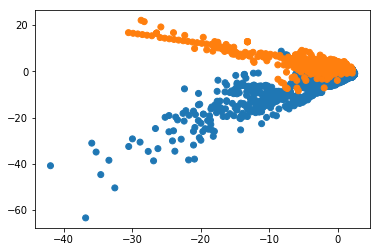

In [7]:
## Introduce todos los pasos que consideres necesarios y posteriormente, evalúa tus datos. ¡Que el lado oscuro te acompañe!
from imblearn.under_sampling import EditedNearestNeighbours

# Pruebas de undersampling simples 

#1) EditedNearestNeighbours

enn = EditedNearestNeighbours(n_neighbors = 55)
X,y = enn.fit_sample(tr[['V1', 'V2']], tr[['Class']])
print('Filas que nos quedamos:', len(enn.sample_indices_))

evaluar_sistema(X, y)
tr_enn = tr.iloc[enn.sample_indices_]
colors = tr_enn['Class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = tr_enn['V1'], y = tr_enn['V2'], c=colors)


# El efecto es claramante elimimar los vecinos limitrofes. El data set sigue desbalanceado y perdemos muestras de la clase mayoritaria,
# conforme aumentamos el parametro n_neighbors.

0    0.994572
1    0.005428
Name: Class, dtype: float64

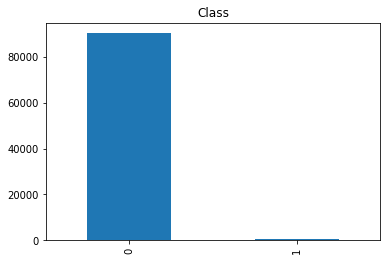

In [8]:
tr_enn = tr.iloc[enn.sample_indices_]
tr_enn['Class'].value_counts().plot(kind='bar', title='Class')
tr_enn['Class'].value_counts()/len(tr_enn['Class'])

Filas que nos quedamos: 100308
Evaluando...
Puntuación obtenida: 13080 (más alta es peor)


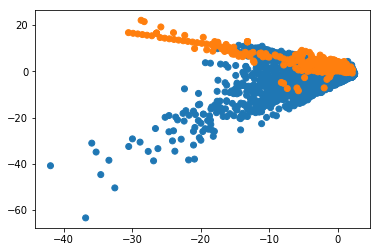

In [9]:
from imblearn.under_sampling import TomekLinks
# Pruebas de undersampling simple
# Tomelinks

sampling_strategy = 'not majority'
#sampling_strategy = 'auto'
tlu = TomekLinks(sampling_strategy)
X,Y = tlu.fit_sample(tr[['V1', 'V2']], tr[['Class']])
print('Filas que nos quedamos:', len(tlu.sample_indices_))
evaluar_sistema(X, Y)
tr_tml = tr.iloc[tlu.sample_indices_]
colors = tr_tml['Class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = tr_tml['V1'], y = tr_tml['V2'], c=colors)

# El dataset esta desbalanceado,en las zonas donde hay pares de ambas clases, usando la estrategia de muestreo not majority,
# remuestrea la clase minoritaria. No se pierden muestras de la clase mayoritaria, pero de cara a un clasificador da la sensacion
# que no ganamos mucho.

0    0.996929
1    0.003071
Name: Class, dtype: float64

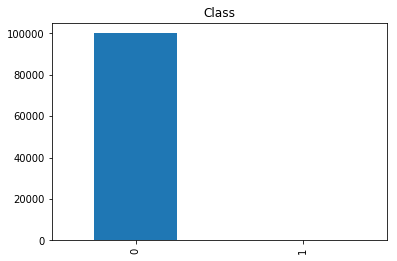

In [10]:
tr_tm = tr.iloc[tlu.sample_indices_]
tr_tm['Class'].value_counts().plot(kind='bar', title='Class')
tr_tm['Class'].value_counts()/len(tr_tm['Class'])

Filas que nos quedamos usando Tomelinks: 100308
Evaluando...
Puntuación obtenida: 13080 (más alta es peor)
Filas que nos quedamos luego de aplicar ENN: 94978
Evaluando...
Puntuación obtenida: 11084 (más alta es peor)


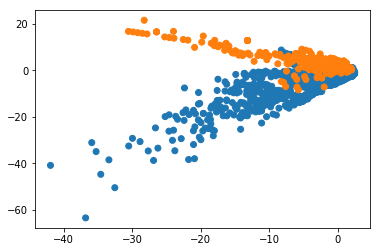

In [11]:
from imblearn.under_sampling import TomekLinks

# Pruebas de undersampling combinadas
# Tomelinks + ENN

sampling_strategy = 'not majority'
tlu = TomekLinks(sampling_strategy)
X,Y = tlu.fit_sample(tr[['V1', 'V2']], tr[['Class']])
print('Filas que nos quedamos usando Tomelinks:', len(tlu.sample_indices_))

evaluar_sistema(X, Y)

enn = EditedNearestNeighbours(n_neighbors = 55,kind_sel='all')
XX,YY = enn.fit_sample(X,Y)
print('Filas que nos quedamos luego de aplicar ENN:', len(enn.sample_indices_))
evaluar_sistema(XX, YY)

tr_tml = tr.iloc[enn.sample_indices_]
colors = tr_tml['Class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = tr_tml['V1'], y = tr_tml['V2'], c=colors)

# En este caso aplicamos dos tecnicas de undersampling, para ver el efecto (TomeLinks + ENN), el dataset sigue desbalanceado, y hemos 
# reducido el tamano total del mismo en aproximadamente 6K filas. Si bien para un clasificador parece que esta distribucion esta bien,
# el numero de muestras de la clase minoritaria parece escaso.

0    0.996757
1    0.003243
Name: Class, dtype: float64

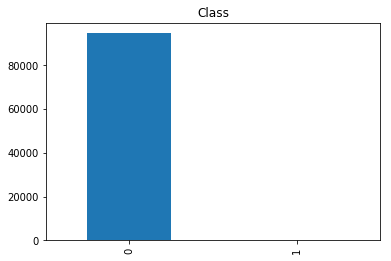

In [12]:
tr_enn_tml = tr.iloc[enn.sample_indices_]
tr_enn_tml['Class'].value_counts().plot(kind='bar', title='Class')
tr_enn_tml['Class'].value_counts()/len(tr_enn_tml['Class'])

Filas que nos quedamos: 99851
Evaluando...
Puntuación obtenida: 5834 (más alta es peor)


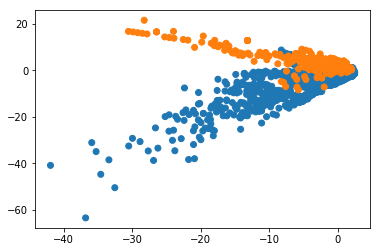

In [13]:
from imblearn.under_sampling import AllKNN
#from imblearn.over_sampling import RandomOverSampler

alkk = AllKNN(sampling_strategy='all',n_neighbors=1)
a,b = alkk.fit_sample(tr[['V1', 'V2']], tr[['Class']])
print('Filas que nos quedamos:', len(alkk.sample_indices_))
evaluar_sistema(a, b)
alkk_tml = tr.iloc[enn.sample_indices_]
colors = alkk_tml['Class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = alkk_tml['V1'], y = alkk_tml['V2'], c=colors)

# Este Algoritmo esta basado en RepeatedEditedNearestNeighbours que a su vez es una variacion de ENN, pero en este caso repite el algoritmo X veces.
# ALKNN difiere de RepeatedEditedNearestNeighbours en que el numero de vecinos mas cercanos se incrementa en uno en cada iteracion. Con esta tecnica, se obtiene
# una puntuacion baja, aunque el desbalanceo es notorio. El resultado en cuanto al grafico es similar a ENN en cuanto a que indice en los bordes, la diferencia es
# que al iterar mas se pierden mas muestras. Tomando solamente en cuenta la puntacion del evaluador, este es el valor mas bajo que he conseguido , teniendo un dataset
# de tamano similar al original. 

0    0.998388
1    0.001612
Name: Class, dtype: float64

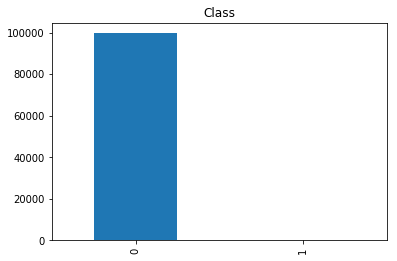

In [14]:
tr_alkk = tr.iloc[alkk.sample_indices_]
tr_alkk['Class'].value_counts().plot(kind='bar', title='Class')
tr_alkk['Class'].value_counts()/len(tr_alkk['Class'])

In [15]:
# Las pruebas que he realizado de oversampling y oversampling + undersampling (i.e SMOTE + ENN), no me han dado buen resultado.
# Por ejemplo SMOTE no va dar un buen resultado puesto que no tiene en cuenta los vecinos de la otra clase y provoca overlapping. 
# Adasyn por su parte al generar datos sinteticos en base a la densidad, en esta distribiucion tambien generara overlapping.



¿Has logrado proteger al Imperio Galáctico de transmisiones enemigas? ¿O has tenido problemas de "jubilación"?
* ¿Qué problemas ves a estos métodos de data augmentation?
* ¿Qué crees que es más razonable cuando te enfrentas a un problema de este tipo?
* La función de evaluación del sistema penaliza con un punto si la clase predecida es de valor 1 pero 50 puntos si la clase predecida es de valor 0. ¿Por qué crees que pasa esto?

1) Con respecto a los metodos de undersampling, el problema es que puedes perder alguna informacion valiosa de los datos.Con respecto a las tecnicas de 
   oversampling , que si bien por un lado , los algoritmos en general funcionaran mejor con mas datos , tiene un coste a nivel de procesamiento. Todo depende
   en gran medida de los datos con los que estemos trabajando. Por ejemplo, en distribuciones donde hay overlapping, tecnicas como SMOTE,ADASYN, no son        especialmente utiles puesto que no tienen en cuenta los vecinos de las otras clases.
   

2) Visualizar los datos, conocer las diferentes tecnicas que se pueden emplear y sobre todo prueba y error.

3) Si el punto de la clase y el predecido es el mismo, logicamente es positvo, luego el valor no se incrementa, si por el contrario son !=,
   puede ocurrir que el predecido sea de la clase mayoritaria, o de la minoritaria. Si es oversampling, entiendo que se penaliza porque no queremos 
   generar en el espacio de la clase mayoritaria, y si es undersampling, entiendo que es porque eliminas datos de una clase.
   
   
  Algunas fuentes de consulta:
  
  https://github.com/djib2011/python_ml_tutorial/blob/master/notebooks/23_preprocessing_2.ipynb
  
  https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/
  
  https://imbalanced-learn.readthedocs.io
  
  http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.71.829&rep=rep1&type=pdf
  
  
  

***

### Punto extra

`Como tarea final, se le exige que nos facilite una identificación. Muestre su rostro real y provea al IMPERIO GALÁCTICO de datos suficientes para poder identificale desde todos los ángulos posibles una vez pase a formar parte de nuestro equipo de datos. Se requiere un mínimo de 5 ejemplos de su rostro para entrenar correctamente el sistema y que nuestras medidas de seguridad no cometan el error de considerarlo una amenaza.`

In [16]:
## Hazte una "selfie" y copiala en la carpeta imgs de este challenge. Cárgala y visualízala correctamente.
## Procésala como se te mostró en el worksheet para que el Imperio pueda identificarte correctamente.

from skimage import io, transform
from skimage.util import random_noise
from skimage import util
from scipy import ndimage
from skimage import exposure
import numpy as np
img = io.imread("imgs/Pablo_Sagrera.jpg")
print("Dimensión Y: {}, Dimensión X: {}, Canales: {}".format(img.shape[0], img.shape[1], img.shape[2]))

Dimensión Y: 720, Dimensión X: 1080, Canales: 3


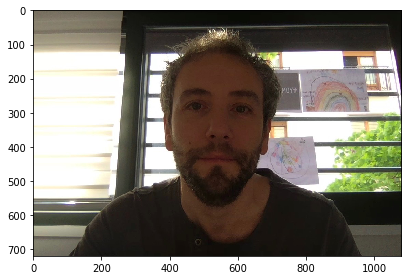

In [17]:
io.imshow(img)

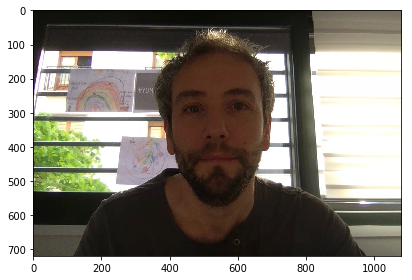

In [18]:
io.imshow(np.fliplr(img))

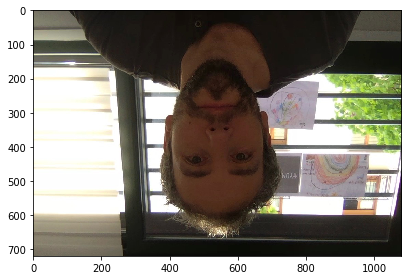

In [19]:
io.imshow(np.flipud(img))

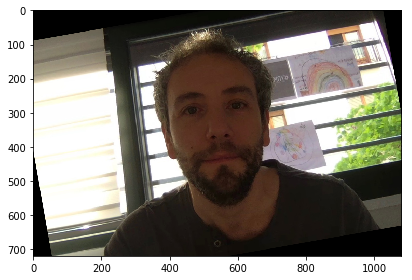

In [20]:
io.imshow(transform.rotate(img, 10, resize=False))

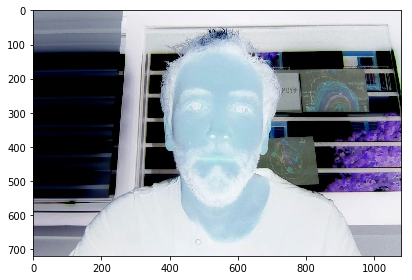

In [21]:
color_inversion_image = util.invert(img)
color_inversion_image_with_np = np.invert(img)
io.imshow(color_inversion_image_with_np)

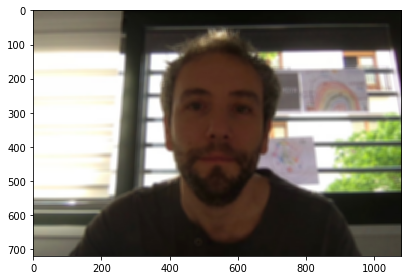

In [22]:
blured_image = ndimage.uniform_filter(img, size=(11, 11, 1))
io.imshow(blured_image)

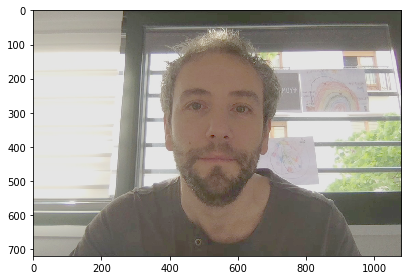

In [23]:
adjusted_gamma_image = exposure.adjust_gamma(img, gamma=0.4, gain=0.9)
io.imshow(adjusted_gamma_image)